In [1]:
import tensorflow as tf

list_ds = tf.data.Dataset.list_files(str('Dataset/training_data/*/*'))

for f in list_ds.take(5):
  print(f.numpy())

b'Dataset/training_data/5/58197.png'
b'Dataset/training_data/1/45233.png'
b'Dataset/training_data/5/51969.png'
b'Dataset/training_data/4/58160.png'
b'Dataset/training_data/9/46141.png'


In [2]:
import os
def parse_image(filename):
  parts = tf.strings.split(filename, os.sep)
  label = parts[-2]
  label = label.numpy().decode('utf-8')

  image = tf.io.read_file(filename)
  image = tf.io.decode_png(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [64, 64])
  return image, label

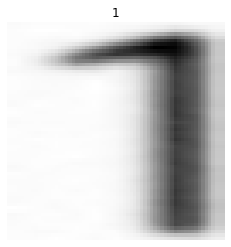

In [3]:
import matplotlib.pyplot as plt

file_path = next(iter(list_ds))
image, label = parse_image(file_path)

def show(image, label):
  plt.figure()
  plt.imshow(image, cmap='Greys_r')
  plt.title(label)#.numpy().decode('utf-8'))
  plt.axis('off')

show(image, label)

In [4]:
images_ds = list_ds.map(parse_image)

for image, label in images_ds.take(2):
  show(image, label)

AttributeError: in user code:

    File "<ipython-input-2-37d939d64e54>", line 5, in parse_image  *
        label = label.numpy().decode('utf-8')

    AttributeError: 'Tensor' object has no attribute 'numpy'


In [28]:
from scipy import stats
import cv2 as cv

def random_rotate_image(image):
  image  = (image.numpy()*255).astype(np.uint8)
  image = cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESh_,\
            cv.THRESH_BINARY,75,10)
  return image.reshape((64,64,1))

In [29]:
image.shape

TensorShape([64, 64, 1])

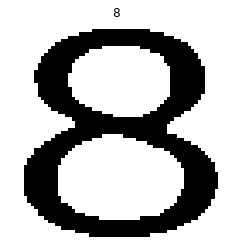

In [30]:
import numpy as np

image, label = next(iter(images_ds))
image = random_rotate_image(image)
show(image, label)


In [31]:
def tf_random_rotate_image(image, label):
  im_shape = image.shape
  [image,] = tf.py_function(random_rotate_image, [image], [tf.float32])
  image.set_shape(im_shape)
  return image, label

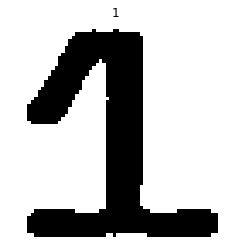

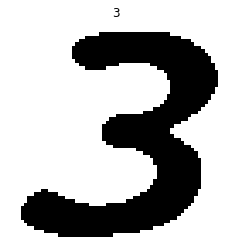

In [32]:
rot_ds = images_ds.map(tf_random_rotate_image)

for image, label in rot_ds.take(2):
  show(image, label)

In [33]:
x = str(label.numpy()).split('\'')

In [34]:
x = str(label.numpy()).split('\'')
int(x[1])

3

In [35]:
label

<tf.Tensor: shape=(), dtype=string, numpy=b'3'>

In [38]:
c = 'dsffd3'
c = c[-1]